<a href="https://colab.research.google.com/github/NishitSingh2023/LSTM-in-Trade/blob/master/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd gdrive/My Drive/Project/LSTM-in-Trade

! git pull

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Project/LSTM-in-Trade
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/NishitSingh2023/LSTM-in-Trade
   63a9394..f366a46  master     -> origin/master
Updating 63a9394..f366a46
Fast-forward
 Capstone_Project.ipynb | 1063 ++++++++++++++++

In [266]:
import numpy as np
import pandas as pd
import datetime as dt
import os
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import  train_test_split
import time
import matplotlib.pyplot as plt
from numpy import newaxis

In [267]:
c = pd.read_csv('DataSet/0stock_metadata.csv', usecols=['Company Name','Symbol'])
print(c)
choice=input("Enter the symbol for the stock to be predicted referring from the table below: ")

                                    Company Name      Symbol
0     Adani Ports and Special Economic Zone Ltd.  ADANIPORTS
1                              Asian Paints Ltd.  ASIANPAINT
2                                 Axis Bank Ltd.    AXISBANK
3                                Bajaj Auto Ltd.  BAJAJ-AUTO
4                             Bajaj Finance Ltd.  BAJFINANCE
5                             Bajaj Finserv Ltd.  BAJAJFINSV
6              Bharat Petroleum Corporation Ltd.        BPCL
7                             Bharti Airtel Ltd.  BHARTIARTL
8                           Bharti Infratel Ltd.    INFRATEL
9                      Britannia Industries Ltd.   BRITANNIA
10                                    Cipla Ltd.       CIPLA
11                               Coal India Ltd.   COALINDIA
12                 Dr. Reddy's Laboratories Ltd.     DRREDDY
13                            Eicher Motors Ltd.   EICHERMOT
14                             GAIL (India) Ltd.        GAIL
15                      

In [268]:
df = pd.read_csv('DataSet/'+choice+'.csv', usecols=['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume'])

In [269]:
df.count()

Date      4977
Symbol    4977
Open      4977
High      4977
Low       4977
Close     4977
Volume    4977
dtype: int64

In [270]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2000-01-03,HDFC,293.5,293.50,293.5,293.50,22744
1,2000-01-04,HDFC,317.0,317.00,297.0,304.05,255251
2,2000-01-05,HDFC,290.0,303.90,285.0,292.80,269087
3,2000-01-06,HDFC,301.0,314.00,295.0,296.45,305916
4,2000-01-07,HDFC,290.0,296.35,281.0,286.55,197039


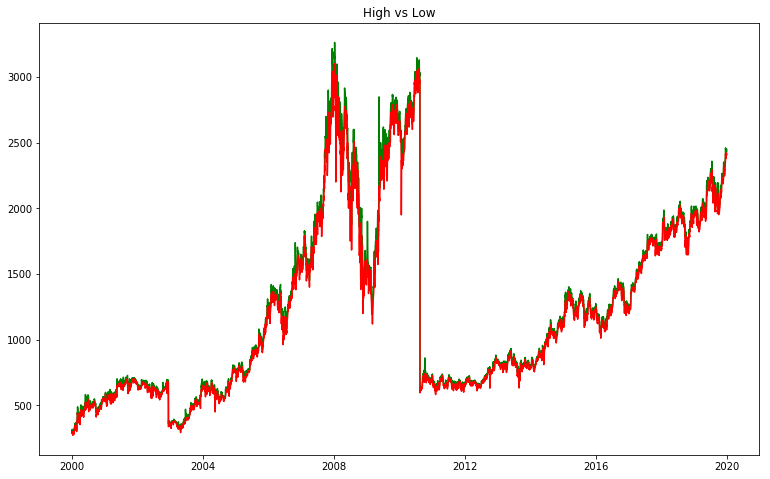

In [271]:
df['Date'] = pd.to_datetime(df['Date'])
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_axes([0, 0, 1, 1])
ax1.set_title('High vs Low')
ax1.plot(df['Date'],df['High'],color='green')
ax1.plot(df['Date'],df['Low'],color='red')
plt.show()

In [272]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Open','High','Low','Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
    new_data['Open'][i] = data['Open'][i]
    new_data['High'][i] = data['High'][i]
    new_data['Low'][i] = data['Low'][i]

In [273]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:4238,:]
valid = dataset[4238:,:]
train=train.reshape(-1,1)
valid=valid.reshape(-1,1)

In [274]:
print(valid)

[[1272.0]
 [1272.0]
 [1213.7]
 ...
 [2435.0]
 [2406.55]
 [2412.55]]


In [290]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(train)
np.append(scaled_data,scaler.fit_transform(valid),axis=0)
scaled_data=scaled_data.reshape(-1,4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [302]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(list(scaled_data[i:i+1])[0][3])
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape[1])
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

IndexError: list index out of range

In [298]:
print(list(scaled_data[1:2])[0][3])

0.010305311585110846


In [246]:
model = Sequential()
model.add(LSTM(180, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(180, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(200, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.add(Activation('relu'))

start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print ('compilation time : ', time.time() - start)

compilation time :  0.0498659610748291


In [247]:
model.fit(x_train, y_train, batch_size=120, epochs=5)

Epoch 1/5
4178/4178 [==============================] - 34s 8ms/step - loss: 0.0015
Epoch 2/5
4178/4178 [==============================] - 26s 6ms/step - loss: 3.8163e-04
Epoch 3/5
4178/4178 [==============================] - 27s 6ms/step - loss: 2.4032e-04
Epoch 4/5
4178/4178 [==============================] - 26s 6ms/step - loss: 2.3448e-04
Epoch 5/5
4178/4178 [==============================] - 26s 6ms/step - loss: 3.0564e-04


In [263]:
inputs = new_data[len(new_data) - len(valid) - 60:].
print(inputs)
inputs  = scaler.transform(inputs)
inputs = inputs.reshape(-1,1)
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

Date
2016-10-05     481.8
2016-10-06       480
2016-10-07       478
2016-10-10     477.2
2016-10-13       477
2016-10-14     477.8
2016-10-17    475.05
2016-10-18     473.1
2016-10-19       485
2016-10-20     497.9
2016-10-21    499.85
2016-10-24       490
2016-10-25       484
2016-10-26    480.75
2016-10-27     471.3
2016-10-28     461.7
2016-10-30    465.05
2016-11-01    465.05
2016-11-02     457.7
2016-11-03       458
2016-11-04    447.75
2016-11-07       455
2016-11-08       453
2016-11-09       425
2016-11-10    451.15
2016-11-11     441.9
2016-11-15     441.5
2016-11-16       449
2016-11-17     443.1
2016-11-18    439.95
               ...  
2019-11-19     248.2
2019-11-20    251.75
2019-11-21     248.4
2019-11-22     243.3
2019-11-25    243.05
2019-11-26     244.2
2019-11-27       239
2019-11-28    239.95
2019-11-29    240.05
2019-12-02    238.25
2019-12-03     238.5
2019-12-04     236.6
2019-12-05     242.7
2019-12-06     243.7
2019-12-09     240.8
2019-12-10     240.4
2019-12-

ValueError: Expected 2D array, got 1D array instead:
array=[481.8  480.   478.   477.2  477.   477.8  475.05 473.1  485.   497.9
 499.85 490.   484.   480.75 471.3  461.7  465.05 465.05 457.7  458.
 447.75 455.   453.   425.   451.15 441.9  441.5  449.   443.1  439.95
 437.5  442.   450.4  448.45 453.   468.   461.4  465.   469.7  470.5
 460.   456.   458.4  455.   458.1  455.   456.5  464.15 460.6  466.3
 462.75 466.9  468.5  462.6  464.65 458.4  455.   466.   469.   473.65
 475.05 473.   467.   477.1  478.5  469.   472.6  477.9  476.   485.1
 482.9  485.35 482.4  483.4  476.55 472.55 482.65 482.   469.5  464.
 465.8  461.   456.   456.   458.65 462.   458.35 458.3  467.35 468.
 477.15 476.55 473.   482.   475.   475.   475.1  474.5  480.   490.
 488.   494.   490.8  491.3  493.5  494.65 493.   485.1  490.   505.7
 497.3  504.   504.   493.1  493.5  503.   509.45 508.35 505.   508.45
 510.75 512.2  516.45 506.   507.1  513.4  514.95 503.8  509.7  500.75
 495.75 491.   497.5  498.   500.   487.4  493.5  503.   493.9  497.
 496.15 498.1  497.15 499.7  500.   504.   507.4  502.85 505.65 510.
 505.5  517.   506.95 527.   521.7  522.   527.7  525.65 534.   539.
 530.   537.55 535.45 543.05 551.55 556.   560.2  549.9  544.05 535.6
 260.   261.3  260.   260.1  256.   255.   254.25 256.   254.   255.5
 258.   260.   256.8  260.   258.   260.   257.8  255.1  260.   266.2
 263.7  263.9  264.15 266.4  267.3  270.   270.75 283.9  290.2  292.85
 290.   290.   290.   290.   289.   294.   294.7  289.8  289.6  291.3
 287.1  286.   288.   290.05 289.4  290.9  288.05 289.35 290.5  291.1
 290.45 290.   290.8  291.45 295.   298.   296.95 297.4  297.   298.
 300.   301.4  302.1  298.1  281.5  287.   283.5  289.3  288.85 290.6
 290.65 293.2  291.   290.65 289.65 287.25 281.4  282.9  283.6  285.
 285.95 286.8  286.95 291.   294.55 291.9  292.   289.6  294.8  292.7
 296.45 297.3  297.8  299.4  296.3  293.25 296.   293.5  293.75 293.9
 299.85 303.75 303.   302.55 300.3  299.8  298.5  298.   298.2  295.1
 297.15 295.7  295.2  294.4  291.25 295.   295.   299.35 292.   286.95
 288.6  283.3  283.55 282.7  284.2  290.5  288.4  288.4  288.6  287.
 295.   294.85 295.8  298.   301.25 303.9  305.9  305.4  311.5  315.85
 320.4  310.1  313.   310.   312.6  316.4  323.55 321.   318.85 316.9
 333.   327.   327.   317.   322.1  316.5  315.7  314.1  309.55 306.1
 305.05 299.3  298.   291.7  298.2  290.1  289.   287.9  290.   295.6
 292.95 293.   290.   294.   292.9  295.5  294.8  292.45 293.   292.8
 293.6  291.25 288.45 286.45 285.   286.3  292.5  295.   295.45 295.
 293.55 286.9  294.5  293.8  284.05 284.6  278.95 274.   283.5  287.3
 285.   283.   286.   284.7  280.6  288.   286.3  289.5  289.   288.1
 288.2  293.   294.8  299.8  294.4  287.9  275.   276.4  276.15 279.
 275.   272.5  270.   275.2  273.   270.9  271.5  271.4  272.8  270.9
 275.   276.5  269.1  264.   265.55 264.1  265.   262.65 261.65 262.9
 261.8  262.95 261.45 260.2  257.15 258.05 264.6  264.5  266.75 269.
 267.15 268.75 269.   265.95 261.3  261.   258.75 257.9  257.5  259.1
 256.4  259.   260.7  261.45 262.05 262.5  263.   263.3  266.   272.95
 272.45 279.8  279.25 283.   286.   286.   287.5  282.5  278.2  275.
 273.4  272.   273.8  273.5  276.   277.   280.45 279.   275.6  279.45
 278.1  279.9  278.   285.   285.   279.4  280.8  284.85 290.   288.7
 292.   296.75 296.55 297.5  300.   327.   310.45 314.55 320.   321.9
 324.4  326.95 325.05 328.75 332.25 329.4  333.4  331.9  330.25 333.
 328.2  321.9  319.   324.   329.35 325.1  324.8  321.4  317.   320.4
 308.   316.15 317.35 320.   322.7  323.35 324.6  318.9  309.2  296.
 318.8  319.   329.   328.2  332.95 329.   315.1  324.8  325.4  328.
 324.75 323.5  325.   324.15 323.5  325.5  330.9  320.   315.   303.4
 316.85 313.95 314.   315.05 325.   328.25 333.   333.25 332.8  328.3
 325.4  329.8  331.   339.   335.95 335.25 335.05 336.25 333.2  322.7
 325.7  327.8  326.2  331.   330.75 328.8  327.   324.5  326.1  325.
 324.55 330.8  325.6  330.05 319.   331.8  337.   336.   340.   336.8
 348.65 350.2  348.25 354.35 356.   359.   366.   370.1  370.   370.
 369.15 372.   371.5  370.9  374.15 374.8  376.4  375.25 378.8  372.55
 363.2  372.8  375.   380.8  384.5  380.25 374.9  370.9  374.   274.4
 280.   261.1  259.   261.   262.5  259.35 258.   264.75 257.8  258.4
 262.45 262.   257.1  255.2  255.9  257.1  256.   263.4  262.4  261.
 261.   263.7  263.5  278.   283.5  282.4  285.   291.35 289.   285.5
 289.7  292.05 293.05 296.4  295.   298.55 293.5  289.9  292.65 294.25
 291.8  291.5  290.5  289.   285.5  283.85 286.5  289.5  290.6  287.
 285.6  283.9  284.   281.   284.5  286.   288.15 288.5  294.   294.
 292.5  295.75 297.   297.5  298.   298.75 300.   299.5  299.   284.05
 287.   285.5  284.   285.15 287.35 283.8  281.6  282.45 284.9  283.
 284.   267.75 267.5  264.7  267.5  268.   260.   259.   262.   261.
 269.1  265.6  264.9  264.5  265.45 262.2  263.   262.9  262.5  271.5
 269.9  261.15 262.   259.   263.   266.   264.9  259.8  250.   250.3
 253.3  253.5  252.   252.95 252.4  248.7  250.1  247.05 250.1  254.1
 251.5  258.9  255.35 251.4  254.   245.7  245.   245.1  246.95 245.4
 245.25 241.9  247.7  240.9  240.5  239.2  237.4  237.   240.   234.2
 238.   238.05 239.25 237.75 237.   239.8  244.95 245.9  248.9  247.85
 249.   252.8  253.9  252.05 254.55 253.65 258.   254.   260.2  259.3
 257.3  259.   257.   260.15 257.2  257.3  254.   254.   252.5  248.2
 251.75 248.4  243.3  243.05 244.2  239.   239.95 240.05 238.25 238.5
 236.6  242.7  243.7  240.8  240.4  237.65 240.35 242.   243.9  244.25
 245.85 248.6  248.   252.8  253.   252.   250.   248.45 247.7 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [252]:
closing_price = model.predict(X_test)
print(len(closing_price))
closing_price.reshape(-1,4)
#closing_price = scaler.inverse_transform(closing_price)
closing_price=closing_price.reshape(-1,4)
#print(closing_price)

3136


In [187]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print(rms)

101.59921873803098


In [188]:
%matplotlib inline

train = new_data[:4238]
valid = new_data[4238:]

valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

ValueError: Length of values does not match length of index

In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y, p(x))

In [ ]:
pred_fig = plt.figure(figsize=(10,6))
ax2 = pred_fig.add_axes([0, 0, 1, 1])
ax2.set_title('Actual vs Predicted close')
ax2.plot(train['Close'], color='blue')
ax2.plot(valid[['Close','Predictions']])

plt.show()